# Exercise 6.4 - Gerardo Pérez

# 2. Import Libraries:

In [440]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
%matplotlib inline

In [6]:
path = r'C:\Users\geram\OneDrive\Escritorio\Data Analysis\Coral Bleaching'

In [302]:
coral_bleach = pd.read_csv(r'C:\Users\geram\OneDrive\Escritorio\Data Analysis\Coral Bleaching\Coral Bleaching Project updated - Gerardo Pérez.csv', delimiter=';', index_col=False)

# 3. Data Cleaning

In [304]:
coral_bleach.head()

,Sample_ID,Cyclone_Frequency,Depth_m,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,10327299,"51,07","50,30",Pacific,Papua New Guinea,"706,63",Sometimes,"0,04",1998,Colony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10327298,"50,90","50,00",Pacific,Papua New Guinea,"3276,02",Sheltered,"0,04",1998,Colony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10327115,"61,03","42,70",Atlantic,Netherlands Antilles,"1422,68",Sometimes,"0,03",2005,Colony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10327430,"39,16","42,00",Indian,Sri Lanka,"976,53",Exposed,"0,07",1998,Colony,...,NaN,Descriptive Statistics,Cyclone_Frequency,Depth_m,Distance_to_Shore,Turbidity,Date_Year,Temperature_Maximum,Percent_Bleaching,Temperature_Mean
4,10327784,"69,08","40,00",Atlantic,United States,"296,21",Exposed,"0,04",2005,Colony,...,NaN,Mean,"52,56634441","7,057877964","3011,037978","0,074959839",NaN,NaN,NaN,NaN


In [306]:
Columns_Info = coral_bleach.columns.tolist()

In [308]:
print(Columns_Info)

['Sample_ID', 'Cyclone_Frequency', 'Depth_m', 'Ocean_Name', 'Country_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Date_Year', 'Bleaching_Level', 'Temperature_Maximum', 'Percent_Bleaching', 'Temperature_Mean', 'Realm_Name', 'Percent_Cover', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']


In [310]:
coral_bleach.drop(columns=['Percent_Cover','Unnamed: 15','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [312]:
coral_bleach_2010_2019 = coral_bleach[coral_bleach['Date_Year'].between(2010, 2019)]

In [314]:
coral_bleach_2010_2019.head()

,Sample_ID,Cyclone_Frequency,Depth_m,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,Percent_Bleaching,Temperature_Mean,Realm_Name
64,10276303,"33,22","29,90",Atlantic,United States,"3312,00",Exposed,"0,07",2012,Colony,"304,72",0%,"299,70",Tropical Atlantic
79,10276831,"88,08","27,00",Atlantic,United States,"2118,00",Exposed,"0,05",2012,Colony,"304,61",430%,"299,70",Tropical Atlantic
80,10276377,"33,22","26,00",Atlantic,United States,"3472,00",Exposed,"0,05",2015,Colony,"304,67",351%,"299,70",Tropical Atlantic
81,10276290,"41,60","25,90",Atlantic,United States,"3316,00",Exposed,"0,06",2012,Colony,"304,72",833%,"299,70",Tropical Atlantic
82,10276832,"57,84","25,60",Atlantic,United States,"2207,00",Exposed,"0,05",2011,Colony,"304,57",1111%,"299,69",Tropical Atlantic


In [316]:
print(coral_bleach_2010_2019.dtypes)

Sample_ID               int64
Cyclone_Frequency      object
Depth_m                object
Ocean_Name             object
Country_Name           object
Distance_to_Shore      object
Exposure               object
Turbidity              object
Date_Year               int64
Bleaching_Level        object
Temperature_Maximum    object
Percent_Bleaching      object
Temperature_Mean       object
Realm_Name             object
dtype: object


In [320]:
# Removing commas and percentage signs, converting data types:

coral_bleach_2010_2019['Cyclone_Frequency'] = pd.to_numeric(coral_bleach_2010_2019['Cyclone_Frequency'].str.replace(',', '.'))
coral_bleach_2010_2019['Percent_Bleaching'] = pd.to_numeric(coral_bleach_2010_2019['Percent_Bleaching'].str.replace('%', ''))
coral_bleach_2010_2019['Depth_m'] = pd.to_numeric(coral_bleach_2010_2019['Depth_m'].str.replace(',', '.'))
coral_bleach_2010_2019['Distance_to_Shore'] = pd.to_numeric(coral_bleach_2010_2019['Distance_to_Shore'].str.replace(',', '.'))
coral_bleach_2010_2019['Turbidity'] = pd.to_numeric(coral_bleach_2010_2019['Turbidity'].str.replace(',', '.'))
coral_bleach_2010_2019['Temperature_Maximum'] = pd.to_numeric(coral_bleach_2010_2019['Temperature_Maximum'].str.replace(',', '.'))
coral_bleach_2010_2019['Temperature_Mean'] = pd.to_numeric(coral_bleach_2010_2019['Temperature_Mean'].str.replace(',', '.'))

C:\Users\geram\AppData\Local\Temp\ipykernel_11916\903300964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coral_bleach_2010_2019['Cyclone_Frequency'] = pd.to_numeric(coral_bleach_2010_2019['Cyclone_Frequency'].str.replace(',', '.'))
C:\Users\geram\AppData\Local\Temp\ipykernel_11916\903300964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coral_bleach_2010_2019['Percent_Bleaching'] = pd.to_numeric(coral_bleach_2010_2019['Percent_Bleaching'].str.replace('%', ''))
C:\Users\geram\AppData\Local\Temp\i

In [322]:
coral_bleach_2010_2019.shape

(14604, 14)

In [324]:
coral_bleach_2010_2019.isnull().sum()

Sample_ID              0
Cyclone_Frequency      0
Depth_m                0
Ocean_Name             0
Country_Name           0
Distance_to_Shore      0
Exposure               0
Turbidity              0
Date_Year              0
Bleaching_Level        0
Temperature_Maximum    0
Percent_Bleaching      0
Temperature_Mean       0
Realm_Name             0
dtype: int64

In [326]:
dups = coral_bleach_2010_2019.duplicated()

In [328]:
dups.shape

(14604,)

In [ ]:
# Data has been cleaned, no missing values or duplicates found
# Numeric data type has been re-assigned to the numeric variables

# 4. Visual data exploration - Scatterplots

C:\Users\geram\AppData\Local\Temp\ipykernel_11916\2458884927.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coral_bleach_2010_2019['Percent_Bleaching'],bins=25)


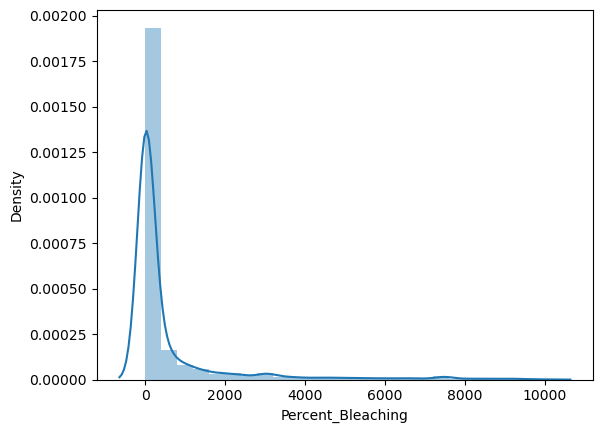

In [330]:
# Extreme Values:

sns.distplot(coral_bleach_2010_2019['Percent_Bleaching'],bins=25)
plt.show()

In [332]:
coral_bleach_2010_2019['Percent_Bleaching'].min() #Check the min

0

In [334]:
coral_bleach_2010_2019['Percent_Bleaching'].mean() #Check the mean

568.6640646398247

In [336]:
coral_bleach_2010_2019['Percent_Bleaching'].median() #Check the median

0.0

In [338]:
coral_bleach_2010_2019['Percent_Bleaching'].max() #Check the max

10000

In [340]:
# Removing extreme values - values higher than the max and below the mean

coral_cleaned = coral_bleach_2010_2019[coral_bleach_2010_2019['Percent_Bleaching'] < 1000].copy()

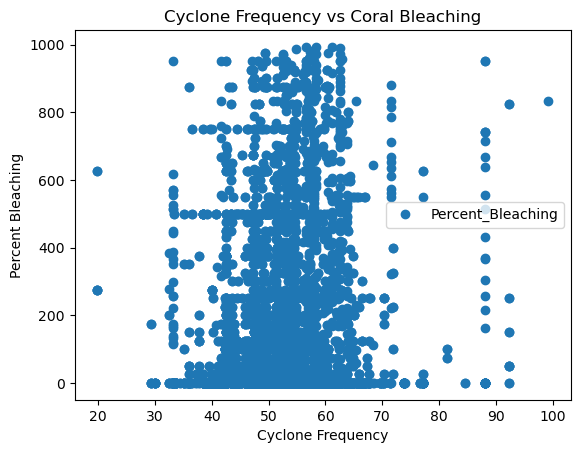

In [186]:
coral_cleaned.plot(x='Cyclone_Frequency', y='Percent_Bleaching', style='o')
plt.title('Cyclone Frequency vs Coral Bleaching')  
plt.xlabel('Cyclone Frequency')  
plt.ylabel('Percent Bleaching')  
plt.show()

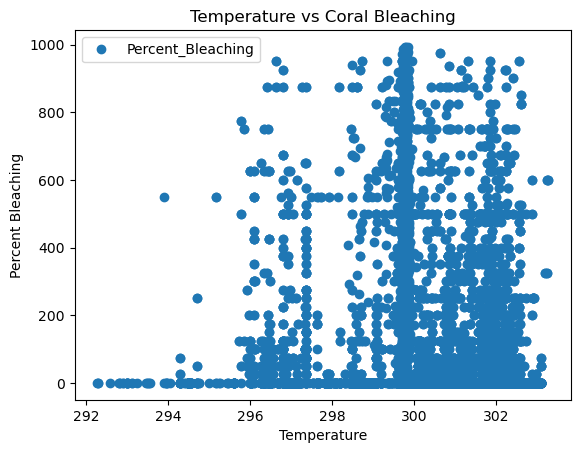

In [342]:
coral_cleaned.plot(x='Temperature_Mean', y='Percent_Bleaching', style='o')
plt.title('Temperature vs Coral Bleaching')  
plt.xlabel('Temperature')  
plt.ylabel('Percent Bleaching')  
plt.show()

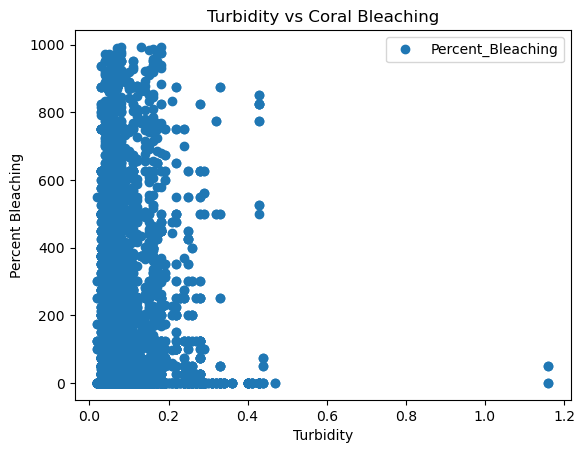

In [344]:
coral_cleaned.plot(x='Turbidity', y='Percent_Bleaching', style='o')
plt.title('Turbidity vs Coral Bleaching')  
plt.xlabel('Turbidity')  
plt.ylabel('Percent Bleaching')  
plt.show()

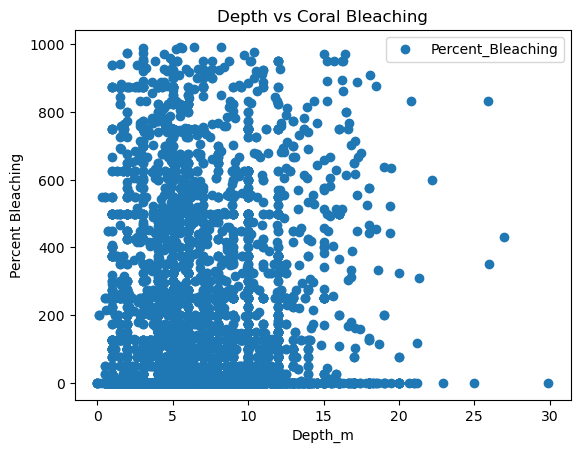

In [346]:
coral_cleaned.plot(x='Depth_m', y='Percent_Bleaching', style='o')
plt.title('Depth vs Coral Bleaching')  
plt.xlabel('Depth_m')  
plt.ylabel('Percent Bleaching')  
plt.show()

# 5. Hypotheses

In [ ]:
# Cyclone Frequency vs Percent Bleaching: at first glance, there seems to be a concentration of data points around 40 - 50 and 60 
# While one hypothesis could be formulated around these points, such as "Higher cyclone frequencies in the ranges of 40, 50, and 60 are associated with an increased likelihood of coral bleaching"
# The data is too spread in order to make a definitve conclusion
# Temperature and Bleaching: "Higher temperatures (300°K) are linked to a higher chance of coral bleaching"
# Temperature vs bleaching shows a stronger visual relationship between these 2 variables, with higher temperatures indicating higher chances of coral bleaching
# Turbidity vs Bleaching: "lower turbidity rates can be associated with an increased chance of coral bleaching"
# Similar to turbidity, depth also shows a negative correlation indicating an increased risk of coral bleaching for coral reefs in shallower waters
# Depth vs Bleaching: "Shallower water levels can be linked to a higher chance of coral bleaching

# 6. Reshaping variables into NumPy arrays

In [392]:
X = coral_cleaned['Turbidity'].values.reshape(-1,1)
y = coral_cleaned['Percent_Bleaching'].values.reshape(-1,1)

In [394]:
X

array([[0.07],
       [0.05],
       [0.05],
       ...,
       [0.06],
       [0.04],
       [0.05]])

In [396]:
y

array([[  0],
       [430],
       [351],
       ...,
       [  0],
       [  0],
       [  0]], dtype=int64)

# 7. Data Split

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8. Linear Regression

# 8.1. Training set

In [400]:
regression = LinearRegression()

In [402]:
regression.fit(X_train, y_train)

LinearRegression()

In [374]:
y_predicted = regression.predict(X_test)

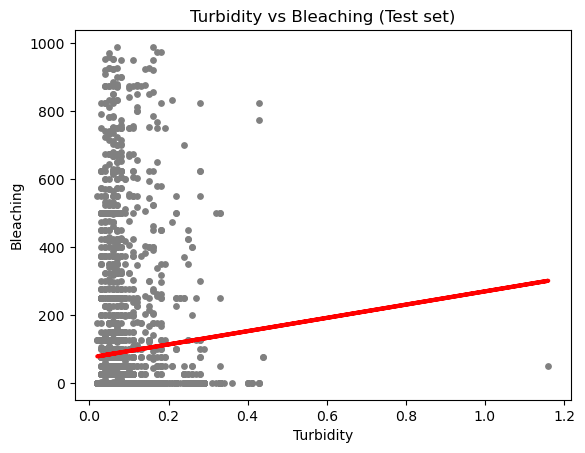

In [422]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Turbidity vs Bleaching (Test set)')
plot_test.xlabel('Turbidity')
plot_test.ylabel('Bleaching')
plot_test.show()

In [ ]:
# The trend line upwards indicates a positive correlation between turbidity and percent_bleaching

# 8.2. Prediction for y on the test set

In [406]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [408]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[195.12895771]]
Mean squared error:  37045.2946886351
R2 score:  0.0021897895039065807


In [410]:
y_predicted

array([[ 82.1500515 ],
       [ 89.95520981],
       [ 93.85778896],
       ...,
       [ 91.90649938],
       [105.56552642],
       [ 86.05263065]])

# 9. Showing the regression line on the test set

In [412]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,275,82.150051
1,0,89.955210
2,0,93.857789
3,0,89.955210
4,375,89.955210
5,0,80.198762
6,0,84.101341
7,0,84.101341
8,500,86.052631
9,0,84.101341


In [414]:
y_predicted_train = regression.predict(X_train)

In [416]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [418]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[195.12895771]]
Mean squared error:  36926.731320684186
R2 score:  0.004129502657533535


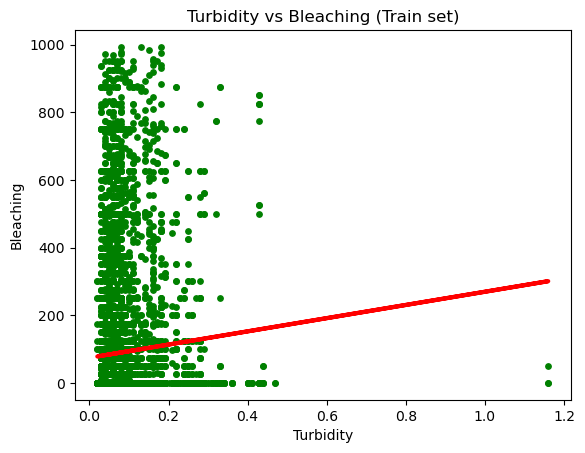

In [424]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Turbidity vs Bleaching (Train set)')
plot_test.xlabel('Turbidity')
plot_test.ylabel('Bleaching')
plot_test.show()

# 10. Results interpretation

In [ ]:
# While the data seems to show a possible impact from turbidity levels on coral bleaching, the data is too spread around the regression line
# This indicates more factors are possibly affecting coral bleaching, instead of just turbidity, as expected
# The regression line indicates a weak positive relationship, however the data is too widely scattered
# The MSE and R2 score values show unfortunately values that suggest the model does not fit the data too well
# MSE values (36929 and 37045) are too high, while on the other hand, the R2 values are too low at 0.004 and 0.002, meaning very 0.2/0.4% is being explained by the model